# 🚢 The Unsinkable: Intro to ML and Ensemble Learning

Hello and welcome to this notebook! Here, we will explore building machine learning models to predict the survival of Titanic passengers. To improve our model's accuracy, we will take an ensemble approach by combining the results of multiple algorithms. So, let's get started!

# Modules

To begin, we need to install the necessary modules and dependencies for this notebook. We will be using `pandas`, `numpy`, and `matplotlib`, which are commonly used in data analysis. Additionally, we will install `seaborn` as it is a user-friendly visualization library. For building our machine learning models, we will be using scikit-learn (`sklearn`), which contains a wide range of models. Finally, we will also install `scipy` for performing hypothesis tests to examine relationships between variables.

In [1]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

#for statistical test
import scipy.stats as ss

#sklearn
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV

#sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Dataset

Great! Now that we have installed our necessary dependencies, let's take a look at the dataset. Fortunately, the dataset has already been separated into training and testing sets for us, which is very convenient.

In [2]:
#read the training and testing dataset
train_data = pd.read_csv("../data/train.csv")
test_data = pd.read_csv("../data/test.csv")

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


It's important to acknowledge that our dataset is relatively small, with only 891 samples in the training set and 418 samples in the testing set. Small datasets may not contain enough information for models to learn effectively, which could impact their accuracy. However, we will focus on the learning process and do our best to create accurate models.

The dataset contains 12 variables, with the testing dataset missing the target variable *Survived*. The variables are fairly self-explanatory, but let's clarify them anyways.

* *PassengerID*: The unique ID of each passenger (the key of the dataset)
* *Survived*: Whether the passenger survived the Titanic tragedy or not
* *Pclass*: The ticket class (1st, 2nd, or 3rd)
* *Name*: The name of the passenger
* *Sex*: The sex of the passenger
* *Age*: The age of the passenger
* *SibSp*: The number of siblings/spouses aboard the Titanic
* *Parch*: The number of parents/children aboard the Titanic
* *Ticket*: The ticket number
* *Fare*: The passenger fare
* *Cabin*: The cabin number
* *Embarked*: The port of embarkation

Some variables, such as *Sex* and *Age*, will likely play a significant role in predicting survival, as women and children were given priority during the evacuation. Now, let's perform some preliminary preprocessing to prepare our data for analysis.

# Preliminary Preprocessing

To ensure that our categorical variables are encoded consistently, let's concatenate the training and testing datasets together. This will allow us to apply the same transformations to both datasets consistently.

In [5]:
data =  pd.concat(objs=[train_data, test_data], axis=0).reset_index(drop=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


We can use the `info()` function to obtain a concise summary of our concatenated dataset, which will show us if there are any missing values.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


We can see that our concatenated dataset has missing values in *Survived*, *Age*, *Cabin*, *Fare*, and *Embarked*. We'll need to address these missing values later, but let's establish a general plan for how to handle them:

* The missing values in *Survived* belong to the testing dataset, which we want to predict with our model, so we don't need to impute these values.
* Since *Cabin* has only 204 non-null values, we will drop the variable entirely instead of trying to impute the majority of missing values.
* For *Age*, *Fare*, and *Embarked*, we'll need to find an appropriate method to impute the missing values.

Additionally, we can drop *PassengerId* since it only contains indices and does not contribute to our final model. Let's remove *Cabin* and *PassengerId* from the dataset first.

In [7]:
data = data.drop(['PassengerId','Cabin'], axis=1)

If we also look at the other variables, *Name* and *Ticket* appear to provide additional information. If we examine the *Name* values closely, we can identify each passenger's title (e.g., Mr., Mrs., Miss, Master, etc.). This information could be a useful variable in helping us predict survivability. Similarly, *Ticket* values appear to have a prefix that could reveal the passenger's location on the ship, which could also be important in predicting survivability.

# EDA (Exploratory Data Analysis)

Ok, now that we have a general idea of our dataset, let's visualize it to gain a deeper understanding of it. Let's start with our target variable, *Survived*.

[Text(0.5, 1.0, 'Survived or Not')]

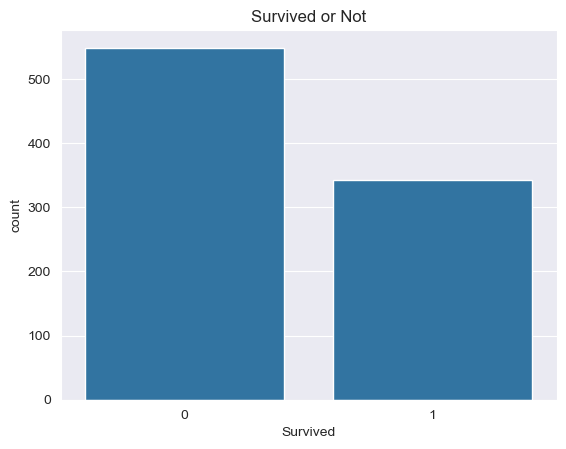

In [8]:
sns.countplot(x='Survived', data=train_data).set(title='Survived or Not')

Based on the visualization, we can see that there is a slight imbalance in the target variable, with value 0 being the majority. Unfortunately, most passengers did not survive the tragedy.

From a data preprocessing standpoint, the imbalance isn't extreme, so we can keep the dataset as is. If the imbalance was more severe, we may need to consider alternative evaluation metrics, machine learning models, and resampling methods to address the imbalance. I've written another notebook on dealing with imbalanced datasets, so if you're interested, click here to take a look! ([Fraud Busters](http://https://www.kaggle.com/code/phchen5/fraud-busters-ml-with-imbalanced-datasets))

## Categorical Variable

Next, let's graph out our categorical variables: *Pclass*, *Sex*, *SibSp*, *Parch* and *Embarked*.

<Axes: xlabel='Embarked', ylabel='count'>

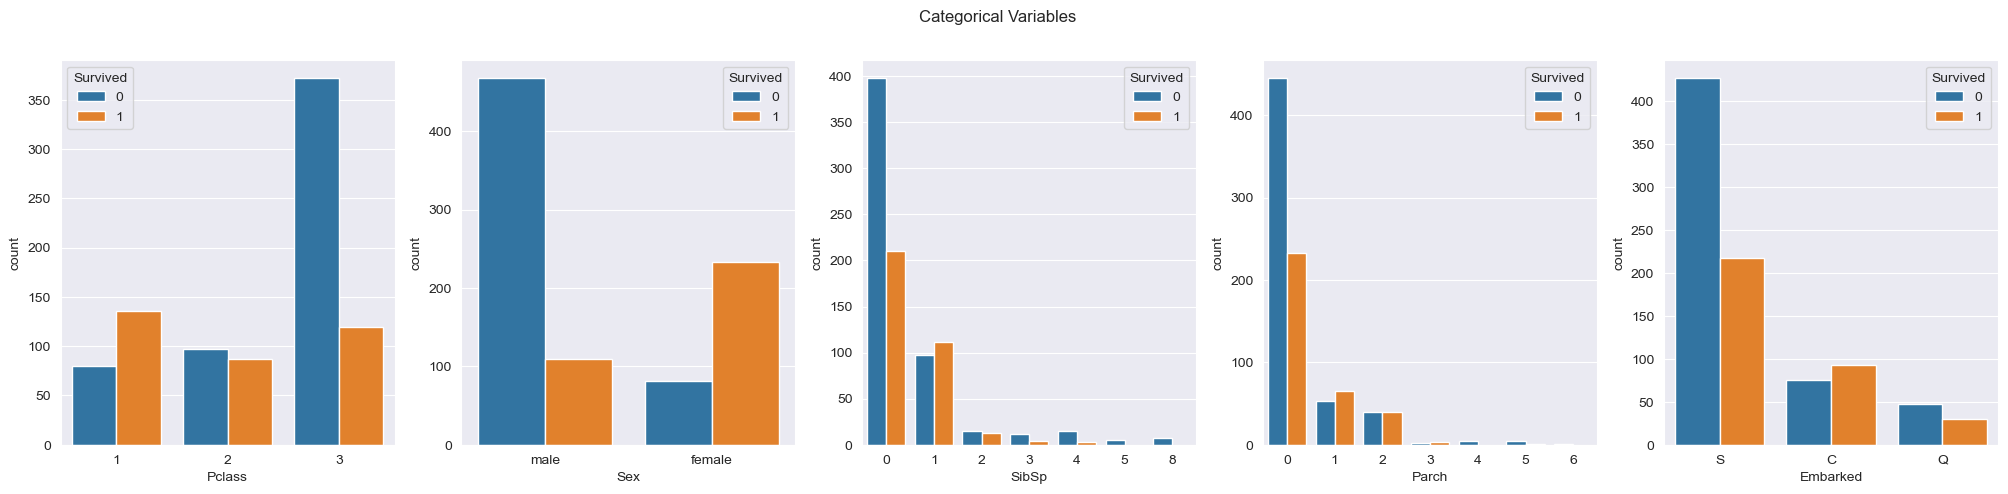

In [9]:
#create subplot
fig, ax = plt.subplots(1, 5, figsize=(25,5))
#create super title
fig.suptitle('Categorical Variables')

#countplot for each variable
sns.countplot(ax=ax[0], x='Pclass', data=train_data, hue='Survived')
sns.countplot(ax=ax[1], x='Sex', data=train_data, hue='Survived')
sns.countplot(ax=ax[2], x='SibSp', data=train_data, hue='Survived')
sns.countplot(ax=ax[3], x='Parch', data=train_data, hue='Survived')
sns.countplot(ax=ax[4], x='Embarked', data=train_data, hue='Survived')

Based on the visualizations, we can already extract some key insights from the data:

* Passengers in *Pclass* 1 had a higher survival rate than those in *Pclass* 2 and 3.
* Female passengers had a higher survival rate than male passengers.
* Passengers with no siblings or spouses (*SibSp*) or parents and children (*Parch*) had a lower survival rate than those with 1-3 siblings/spouses or parents/children.
* Passengers who embarked from Cherbourg had a higher survival rate than those who embarked from other ports.

Furthermore, we can see that the distributions of *SibSp* and *Parch* are similar, and both variables refer to family size. Combining these two variables into a single variable called *family_size* could simplify our analysis and potentially improve the accuracy of our models. This new variable would represent the total number of family members (siblings/spouses/parents/children) traveling with each passenger.

## Numerical Variable

We are left with two continuous numeric variables: `Age` and `Fare`. Let's visualize these too.

<Axes: xlabel='Fare', ylabel='Count'>

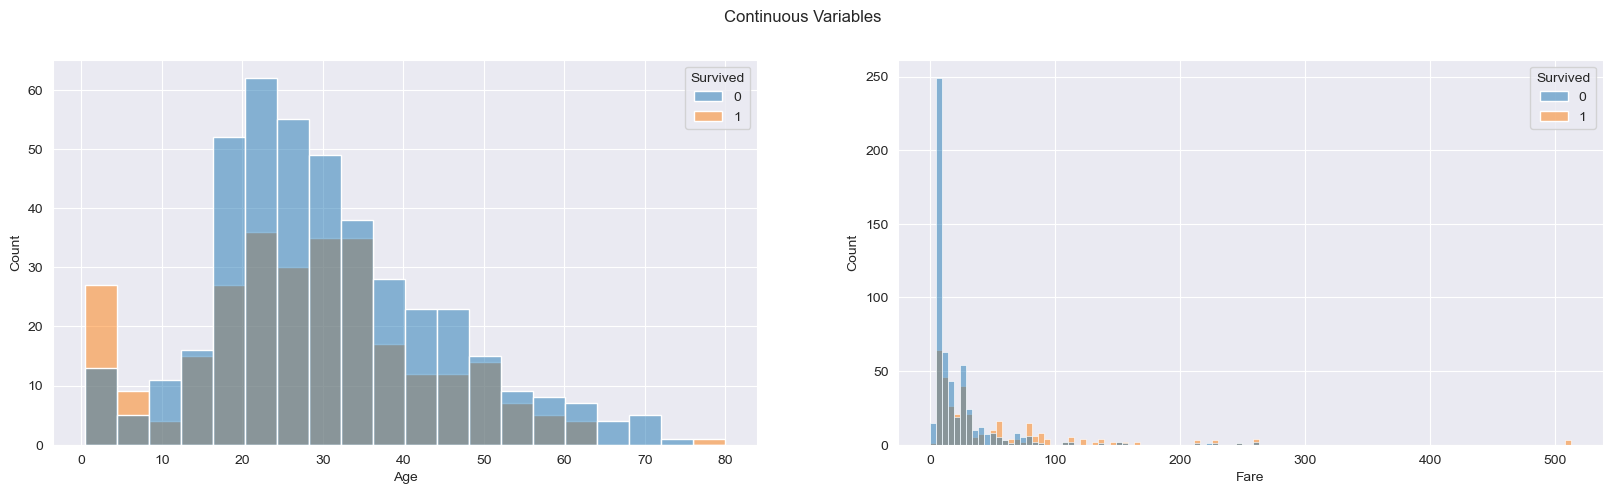

In [10]:
#create subplots
fig, ax = plt.subplots(1, 2, figsize=(20,5))
#create super title
fig.suptitle('Continuous Variables')

#plot histogram
sns.histplot(ax=ax[0], x='Age', data=train_data, hue='Survived')
sns.histplot(ax=ax[1], x='Fare', data=train_data, hue='Survived')

Wow! The visualization shows a clear difference in the distribution of *Age* and *Fare* between the passengers who survived and those who did not.

* There is a higher survival rate for very young children, indicating that they were given priority during the evacuation.
* Passengers who paid higher fares had a higher survival rate, which is consistent with the idea that passengers with higher socioeconomic status may have had better access to lifeboats and other resources.

Additionally, the *Fare* distribution is right-skewed, so we may need to normalize it during preprocessing to ensure that it has a more normal distribution that is better suited for some machine learning models.

# Data Preprocessing

Simply through examining the data on a shallow level has allowed us to identify some key insights and tasks that we need to accomplish in the data preprocessing stage. Let's start with extracting people's *title* from the *Name* variable.

## Name

If we look carefully at the names of the passenger, the titles in the *Name* column are formatted in a consistent manner, which is fortunate for us. This makes it easier to extract the titles using regular expressions.

In [11]:
#extract title from Name
data["title"] = data['Name'].str.extract('([A-Za-z]+\.)', expand = False)

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/var/folders/_z/fqc2y1zs5nxfts7kcfj9y20w0000gn/T/ipykernel_57390/3828110329.py:2: SyntaxWarning: invalid escape sequence '\.'
  data["title"] = data['Name'].str.extract('([A-Za-z]+\.)', expand = False)


Let's take a look at the titles we extracted.

In [12]:
data.title.value_counts()

title
Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
Countess.      1
Jonkheer.      1
Dona.          1
Name: count, dtype: int64

We can see that there are some rare titles in the *Name* column that occur infrequently. To simplify our analysis, we can combine these rare titles into one category called *Other*. 

Additionally, we can combine *Miss.*, *Ms.*, and *Mlle.* into one category called *Miss.*, since they all refer to unmarried women. Similarly, we can combine *Mrs.* and *Mme.* into one category called *Mrs.*, since they both refer to married women. This will further simplify our analysis and reduce the number of categories we need to consider.

Once we have completed these steps, we can drop the *Name* variable from the dataset, since it provides no additional information that cannot be captured by the *title* variable.

Overall, these steps will allow us to effectively extract valuable information from the *Name* column and incorporate it into our analysis.

In [13]:
#group titles into the same category
data['title'] = data['title'].replace(['Lady.', 'Countess.','Capt.', 'Col.', 'Don.', 'Dr.', 'Major.', 'Rev.', 'Sir.', 'Jonkheer.', 'Dona.'], 'Other')
data['title'] = data['title'].replace(['Ms.', 'Mlle.'], 'Miss.')
data['title'] = data['title'].replace('Mme.', 'Mrs.')

#drop Name
data = data.drop(['Name'], axis=1)

Since we now have a new variable, it would be insightful to visualize it, as we did with the other variables.

<Axes: xlabel='title', ylabel='count'>

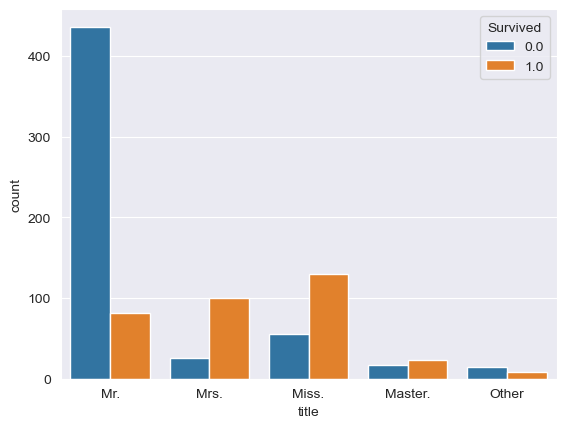

In [14]:
sns.countplot(x='title', data=data, hue='Survived')

Passengers with the titles *Mrs.* and *Miss.* have a significantly higher chance of survival, which is consistent with the result we obtained from the gender plot. Now, let's move on to our next task, which is building the *family_size* variable.

## Family Size

We mentioned that, since the distributions of *SibSp* and *Parch* are similar, it would be beneficial to combine them into a single variable called *family_size*. We can calculate the family size by adding 1 to the sum of *SibSp* and *Parch* (including the passenger itself). Additionally, visualizing the *family_size* variable could provide us with valuable insights into its distribution, which could be an important predictor of survivability.

<Axes: xlabel='family_size', ylabel='count'>

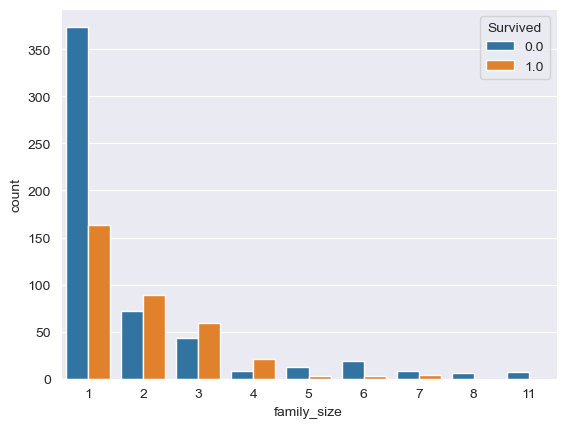

In [15]:
#create family_size
data['family_size'] = data['SibSp'] + data['Parch'] + 1

#visualize family_size
sns.countplot(x='family_size', data=data, hue='Survived')

From our visualization of the *family_size* variable, we can see that passengers traveling alone (`FamilySize=1`) had a higher death rate, which suggests that they may have been the heroes who sacrificed their lives for the sake of others. Passengers traveling with a family size of 2-4 had a higher survival rate, while those with a family size of 5-7 had a lower survival rate. Interestingly, all passengers with 8 or 11 family members survived the tragedy.

Based on these patterns, we can group the *family_size* variable into categories to simplify our analysis further and potentially improve the accuracy of our models. This could involve creating a new categorical variable that represents the size of the passenger's family group, such as *is_alone*, *small*, *medium*, or *large*, which could be used as a feature in our machine learning models.

<Axes: xlabel='family_size', ylabel='count'>

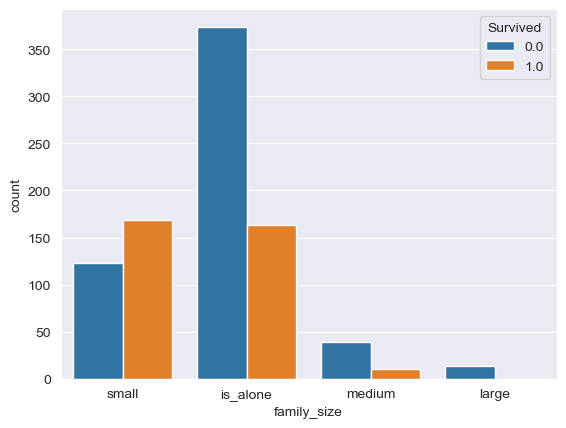

In [16]:
#categorize family_size
data['family_size'] = data['family_size'].replace(1, 'is_alone')
data['family_size'] = data['family_size'].replace([2, 3, 4], 'small')
data['family_size'] = data['family_size'].replace([5, 6, 7], 'medium')
data['family_size'] = data['family_size'].replace([8, 11], 'large')

sns.countplot(x='family_size', data=data, hue='Survived')

## Ticket

Dealing with the *Ticket* variable can be challenging as some tickets start with a prefix, and it is unclear whether this information can improve our model's predictive power. However, let's investigate this further by extracting the ticket prefixes and explore whether it can be used as a feature in our machine learning models.

In [17]:
#create ticket_prefix
ticket_pref = []

for ticket in list(data.Ticket):
    if not ticket.isdigit() :
        ticket_pref.append(ticket.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        ticket_pref.append("None")
        
data["Ticket_Pref"] = ticket_pref

data.Ticket_Pref.value_counts()

Ticket_Pref
None       957
PC          92
CA          68
A5          28
SOTONOQ     24
WC          15
SCPARIS     14
STONO       14
A4          10
FCC          9
C            8
SOC          8
SOPP         7
STONO2       7
SCParis      5
SCAH         5
PP           4
LINE         4
WEP          4
FC           3
SOTONO2      3
SCA4         2
SWPP         2
PPP          2
SC           2
SCA3         1
A            1
LP           1
AQ4          1
STONOQ       1
Fa           1
CASOTON      1
AS           1
SCOW         1
SOP          1
SP           1
AQ3          1
Name: count, dtype: int64

It seems that most ticket values are just unique series without any prefixes, and many prefixes only have a few occurrences, which may not provide sufficient information to improve our model's predictive power. Therefore, let's take a step back and investigate whether the presence of a prefix in the ticket value has any significant effect on the passenger's survivability.

In [18]:
#create a variable that determines whether a ticket value contains a prefix or not
ticket_pref_bool = []

for x in data['Ticket_Pref']:
  if x != "None":
    ticket_pref_bool.append("Y")
  else:
    ticket_pref_bool.append("N")
    
data['Ticket_Pref_bool'] = ticket_pref_bool

To investigate whether the presence of a prefix in the ticket value has any effect on survivability, we can use the `crosstab` function in pandas to create a contingency table of our new variable *Ticket_Pref_bool* and our target variable *Survived*.

In [19]:
contingency_table = pd.crosstab(data.Survived,data.Ticket_Pref_bool)
contingency_table

Ticket_Pref_bool,N,Y
Survived,,
0.0,407,142
1.0,254,88


We can then perform a **Chi-square Test** on the contingency table to see whether there is statistical dependency between the two variables (or whether they are related or not).

In [20]:
(chi2, p, df, arr) = ss.chi2_contingency(contingency_table, correction = False)

print("The p-value is "+ str(p))

The p-value is 0.9644882460741132


The resulting p-value from the Chi-square test is very high, indicating that there is no significant relationship between the presence of a ticket prefix and the passenger's ultimate fate. Therefore, it may be more appropriate to simply drop the *Ticket* variable from our analysis.

In [21]:
#drop Ticket
data = data.drop(['Ticket','Ticket_Pref','Ticket_Pref_bool'], axis=1)

## Pclass

*Pclass* is a categorical variable encoded in integers. It has the wrong data type, so we must change it back to a "category".

In [22]:
#change Pclass datatype
data["Pclass"] = data["Pclass"].astype("category")

## Embarked

*Embarked* contains just two missing values. We can simply impute them with the mode of the variable.

In [23]:
#impute with mode
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

## Fare

*Fare* has just one missing value and a skewed distribution. Taking the skewness into consideration, the median value might be a better imputation method than the mean value. We'll also use log transformation to normalize and scale down the distribution. Normalization is often required in many machine learning data preproecssing so that variables are on a similar scale. This is important because we don't want variables to have a disproportionate influence on the result due to their larger values.

In [24]:
#impute with median
data['Fare'] = data['Fare'].fillna(data['Fare'].median())
#log transformation
data['fare_log'] = np.log(data['Fare']+1)

## Age

Out of all variables, I found *Age* the most difficult to handle. It has 200+ missing values, leaving us with many possible methods of imputation. It's also quite an important variable, so I don't want to just drop it entirely. I initially considered using **KNN imputation** for filling the missing values in the dataset, but I wanted to have a clear justification for my choice of imputation method.. So I went around the internet looking for a good method. I came upon a suggestion that uses *title* and *Parch* to impute the age. Credits to [Allohvk](http://https://www.kaggle.com/code/allohvk/titanic-missing-age-imputation-tutorial-advanced/notebook) from Kaggle.

Let's take a look at how *Age* is distributed across different *titles*.

<Axes: xlabel='title', ylabel='Age'>

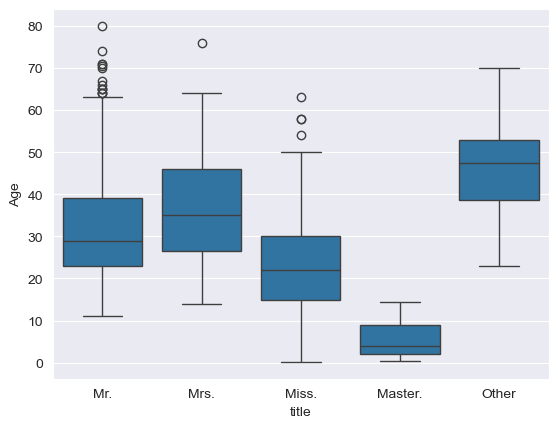

In [25]:
sns.boxplot(y='Age', x='title', data=data)

We can see that passengers with the title *Master* are a lot younger than the other titles. People with titles *Mr.*, *Mrs.*, and *Other* are older overall. Only *Miss.* spans across a huge range of age. This is likely because there are no proper titles for a teenage girl. We will have to look more specifically into the *Miss.* title. Let's filter all other titles out.

In [26]:
data_miss = data[data['title']=='Miss.'].copy()

After restricting our dataset to only samples with title *Miss.*, we then look at how *Age* is distributed across *Parch*. Do you see where we're going with this?

<Axes: xlabel='Parch', ylabel='Age'>

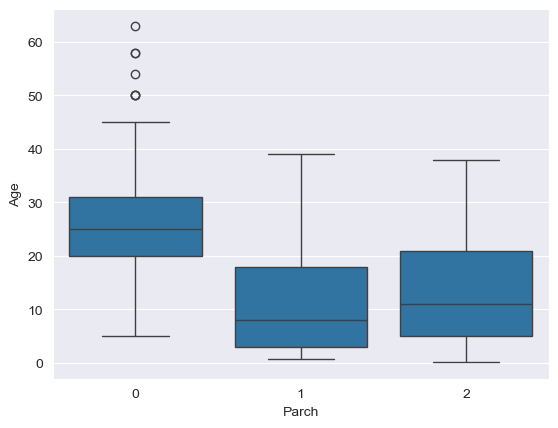

In [27]:
sns.boxplot(y='Age', x='Parch', data=data_miss)

We can see that people without parents or children on board are generally older. Those with family members on board, on the other hand, are younger. This finding totally makes sense because it's unlikely that a child will be on a cruise ship by him/herself.

We can use this information to help us impute the missing *Age* values. If the *title* of the passenger with the missing value is not *Miss.*, we can impute the missing value using the median age based on the passenger's *title*. However, if the *title* of the passenger with the missing value is *Miss.*, we can narrow down the search to only passengers with the title *Miss.*, and use the median age based on *Parch*. While this method is not perfect, it is a reasonable approach that I found to be super cool!

In [28]:
index_NaN_age = list(data["Age"][data["Age"].isnull()].index)
age_imputation = []

for i in index_NaN_age:
    
    title = data.loc[i,"title"]
    
    #if the title is not miss
    if title != 'Miss.':
        
        #impute missing age value using median of title
        age_pred = data[data['title']==title]['Age'].median()
    
    #if title is miss
    else:
        
        #impute missing age value using Parch
        parch = data.loc[i,"Parch"]
        age_pred = data_miss[data_miss['Parch']==parch]['Age'].median()
  
    data['Age'].iloc[i] = age_pred

/var/folders/_z/fqc2y1zs5nxfts7kcfj9y20w0000gn/T/ipykernel_57390/147307425.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'].iloc[i] = age_pred
/var/folders/_z/fqc2y1zs5nxfts7kcfj9y20w0000gn/T/ipykernel_57390/147307425.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'].iloc[i] = age_pred
/var/folders/_z/fqc2y1zs5nxfts7kcfj9y20w0000gn/T/ipykernel_57390/147307425.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [29]:
data.loc[index_NaN_age]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,family_size,fare_log
5,0.0,3,male,29.0,0,0,8.4583,Q,Mr.,is_alone,2.246893
17,1.0,2,male,29.0,0,0,13.0000,S,Mr.,is_alone,2.639057
19,1.0,3,female,35.0,0,0,7.2250,C,Mrs.,is_alone,2.107178
26,0.0,3,male,29.0,0,0,7.2250,C,Mr.,is_alone,2.107178
28,1.0,3,female,25.0,0,0,7.8792,Q,Miss.,is_alone,2.183711
...,...,...,...,...,...,...,...,...,...,...,...
1299,NaN,3,female,25.0,0,0,7.7208,Q,Miss.,is_alone,2.165711
1301,NaN,3,female,25.0,0,0,7.7500,Q,Miss.,is_alone,2.169054
1304,NaN,3,male,29.0,0,0,8.0500,S,Mr.,is_alone,2.202765
1307,NaN,3,male,29.0,0,0,8.0500,S,Mr.,is_alone,2.202765


We can see that the missing age values have been imputed accordingly. The *Age* values seem a little high compared to the other variables, so let's finish preprocessing this variable off by scaling it down using `MinMaxScaler()` (transforms variable to between 0 and 1).

In [30]:
#Normalize
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[["Age_minmax"]] = scaler.fit_transform(data[["Age"]])

All of our variables should be ready by now. We are only one step from completing our preprocessing stage, categorical encoding (transform categorical values to numerical representation).

In [31]:
#categorical encoding
cat_variables = data[['Sex','Embarked', 'title', 'family_size', 'Pclass']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)

#drop original variable
data = data.drop(['Sex','Embarked', 'title', 'family_size', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], axis=1)
data = pd.concat([data, cat_dummies], axis=1)
data.head()

,Survived,fare_log,Age_minmax,Sex_male,Embarked_Q,Embarked_S,title_Miss.,title_Mr.,title_Mrs.,title_Other,family_size_large,family_size_medium,family_size_small,Pclass_2,Pclass_3
0,0.0,2.110213,0.273456,True,False,True,False,True,False,False,False,False,True,False,True
1,1.0,4.280593,0.473882,False,False,False,False,False,True,False,False,False,True,False,False
2,1.0,2.188856,0.323563,False,False,True,True,False,False,False,False,False,False,False,True
3,1.0,3.990834,0.436302,False,False,True,False,False,True,False,False,False,True,False,False
4,0.0,2.202765,0.436302,True,False,True,False,True,False,False,False,False,False,False,True


Perfect! Our data is finally cleaned and we are ready to move on.

# Train-test-split

Remember at the beginning where we combined the training and testing set so that we can preprocess the data consistently? It's time to split it back. Don't forget to drop the empty target column in the testing set.

In [32]:
#train-test-split
train = data[:len(train_data)]
test = data[len(train_data):]

#drop Survived from testing set
test = test.drop(labels=["Survived"],axis = 1)

To build our ML models, we need to split the training set further into our X (predictor variables) and y (target) variables.

In [33]:
#X variables are all variables other than first column
X_train = train.iloc[:,1:]

#y variable is our first column
y_train = train.iloc[:,0]

Now that our data is properly split, we can start buiding and training our models.

# Model Building

For this classification task, we will adopt an ensemble approach that combines several popular classifiers, including **logistic regression**, **decision tree**, and **support vector machines**. To ensure that the results can be replicated, we will set our `random_state` to 0. Additionally, since this is a classification task, we will use **Stratified K-Fold cross-validation** to ensure that classes are distributed proportionally in the validation process.

In [34]:
#set random state
random_state = 0

#cross validation with five fold
cv = StratifiedKFold(n_splits=5)

## Logistic Regression

We'll start with building the most simple and basic classifier, logistic regression. Since our dataset isn't very large, we have the time to finetune the parameters using `GridSearchCV`. Let's see how well our baseline model logistic regression performs on this dataset.

In [35]:
#instantiate logistic regression model
logreg = LogisticRegression()

#parameters to tune
logreg_param_grid = {"solver": ['liblinear'],
                     "penalty": ['l2', 'l1'],
                     "C": [15, 10, 1.0, 0.1, 0.01]}

#gridsearch
logreg_grid_search = GridSearchCV(logreg, param_grid=logreg_param_grid, n_jobs=-1, cv=cv, scoring='accuracy', verbose=1)

logreg_grid_result = logreg_grid_search.fit(X_train,y_train)

logreg_best = logreg_grid_result.best_estimator_

#summarize results
print("Best: %f using %s" % (logreg_grid_result.best_score_, logreg_grid_result.best_params_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Best: 0.822660 using {'C': 15, 'penalty': 'l2', 'solver': 'liblinear'}


Not too bad for a baseline model! It achieved an 82% accuracy on cross validation. Let's run the other algorithms and compare the performances.

## Decision Tree Classifier

In [36]:
#instantiate decision tree model
dt = DecisionTreeClassifier(random_state=random_state)

#parameters to tune
dt_param_grid = {'max_depth': [2, 3, 5, 10, 20],
                 'min_samples_leaf': [5, 10, 20, 50, 100],
                 'criterion': ["gini", "entropy"]}

#grid search
dt_grid_search = GridSearchCV(dt, param_grid=dt_param_grid, cv=cv, n_jobs=-1, verbose=1, scoring = "accuracy")

dt_grid_result = dt_grid_search.fit(X_train, y_train)

dt_best = dt_grid_result.best_estimator_

#summarize results
print("Best: %f using %s" % (dt_grid_result.best_score_, dt_grid_result.best_params_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best: 0.827136 using {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 10}


## Random Forest Classifier

In [37]:
#instantiate Random Forest Classifier
rfm = RandomForestClassifier(random_state=random_state)

#parameters to tune
rfm_param_grid = {"max_features": [2, 4, 6, 8],
                 "min_samples_split": [ 3, 10, 12, 15],
                 "min_samples_leaf": [1, 3, 10],
                 "n_estimators" :[100,300,400,500]}

#gridsearch
rfm_grid_search = GridSearchCV(rfm, param_grid=rfm_param_grid, cv=cv, n_jobs=-1, verbose=1, scoring = "accuracy", error_score='raise')

rfm_grid_result = rfm_grid_search.fit(X_train, y_train)

rfm_best = rfm_grid_result.best_estimator_

# summarize results
print("Best: %f using %s" % (rfm_grid_result.best_score_, rfm_grid_result.best_params_))

Fitting 5 folds for each of 192 candidates, totalling 960 fits


Best: 0.850725 using {'max_features': 8, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}


## Naive Bayes

In [38]:
#instantiate NB
nb = GaussianNB()

# evaluate model
nb_scores = cross_val_score(nb, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(nb_scores), np.std(nb_scores)))

Accuracy: 0.416 (0.022)


## Support Vector Machines

In [39]:
#instantiate support vector machine
svc = SVC(probability=True)

#parameters to tune
svc_param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

#gridsearch
svc_grid_search = GridSearchCV(svc, param_grid=svc_param_grid, cv=cv, n_jobs=-1, verbose=1, scoring = "accuracy")

svc_grid_result = svc_grid_search.fit(X_train, y_train)

svc_best = svc_grid_result.best_estimator_

#summarize results
print("Best: %f using %s" % (svc_grid_result.best_score_, svc_grid_result.best_params_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best: 0.830507 using {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


## Adaboost

In [40]:
#instantiate Adaboost
ada = AdaBoostClassifier(random_state=random_state)

#parameters to tune
ada_param_grid = {"n_estimators" :[50, 100, 200, 300, 400],
                  "learning_rate":  [0.3, 0.5, 1.0, 1.5, 2.0]}

#gridsearch
ada_grid_search = GridSearchCV(ada, param_grid=ada_param_grid, cv=cv, n_jobs=-1, verbose=1, scoring = "accuracy")

ada_grid_result = ada_grid_search.fit(X_train, y_train)

ada_best = ada_grid_result.best_estimator_

#summarize results
print("Best: %f using %s" % (ada_grid_result.best_score_, ada_grid_result.best_params_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best: 0.826062 using {'learning_rate': 1.0, 'n_estimators': 100}


## Gradient Boosting

In [41]:
#Instantiate Gradient Boosting
gbc = GradientBoostingClassifier()

#parameters to tune
gbc_param_grid = {
    'n_estimators' : [100,200,300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [4, 8],
    'min_samples_leaf': [100,150],
    'max_features': [0.3, 0.1]
}

#gridsearch
gbc_grid_search = GridSearchCV(gbc, param_grid=gbc_param_grid, cv=cv, n_jobs=-1, verbose=1, scoring = "accuracy")

gbc_grid_result = gbc_grid_search.fit(X_train, y_train)

gbc_best = gbc_grid_result.best_estimator_

#summarize results
print("Best: %f using %s" % (gbc_grid_result.best_score_, gbc_grid_result.best_params_))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best: 0.839508 using {'learning_rate': 0.1, 'max_depth': 8, 'max_features': 0.3, 'min_samples_leaf': 100, 'n_estimators': 300}


## K-nearest Neighbor

In [42]:
#instantiate KNN
knn = KNeighborsClassifier()

#parameters to tune
knn_param_grid = {'n_neighbors' : [3,4,5,6,7,8,9,10],
                  'weights' : ['uniform','distance'],
                  'metric' : ['minkowski','euclidean','manhattan']}

#gridsearch
knn_grid_search = GridSearchCV(knn, param_grid=knn_param_grid, cv=cv, n_jobs=-1, verbose=1, scoring = "accuracy")

knn_grid_result = knn_grid_search.fit(X_train, y_train)

knn_best = knn_grid_result.best_estimator_

#summarize results
print("Best: %f using %s" % (knn_grid_result.best_score_, knn_grid_result.best_params_))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best: 0.819321 using {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}


Wow! We just built eight different models! For each model (other than Naive Bayes), we performed some degree of tuning using `GridSearchCV`. I decided not to dive into the specifics of each algorithm because there are already plenty of online resources that do great explanations (If you're not familiar with any of the algorithms, I recommend you to watch [Statquest with Josh Starmer](http://https://www.youtube.com/@statquest). He does a splendid job breaking down these algorithms into layman's terms).

# Model Comparison

Now, let's take a look at the results shall we? Let's visualize and compare the accuracy (our main evaluation metric) of the eight models.

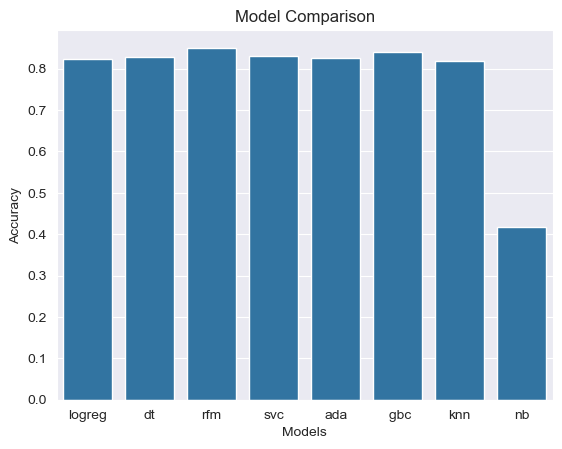

In [43]:
performance = pd.DataFrame([logreg_grid_result.best_score_,
                            dt_grid_result.best_score_, 
                            rfm_grid_result.best_score_,
                            svc_grid_result.best_score_, 
                            ada_grid_result.best_score_, 
                            gbc_grid_result.best_score_, 
                            knn_grid_result.best_score_, 
                            np.mean(nb_scores)], 
                            index=['logreg', 'dt', 'rfm', 'svc', 'ada', ' gbc', 'knn', 'nb'],
                            columns=["accuracy"])

sns.barplot(y='accuracy', x=performance.index, data=performance)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison") # You can comment this line out if you don't need title
plt.show()

The **Random Forest Classifier** appears to be the top performer among all classifiers, achieving an accuracy of 85%. The remaining classifiers also perform decently, except for Naive Bayes. Therefore, we will exclude the Naive Bayes model and use the remaining seven models to build our ultimate ensemble model. The approach is simple: we combine the predictive power of these classifiers into a single large voting classifier. However, before proceeding, we need to determine whether the classifiers' predictions on the test set vary.

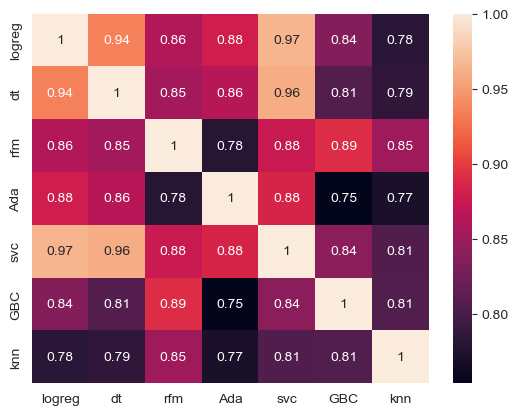

In [44]:
#prediction results on testing set for the seven models
test_Survived_logreg = pd.Series(logreg_best.predict(test), name="logreg")
test_Survived_dt = pd.Series(dt_best.predict(test), name="dt")
test_Survived_rfm = pd.Series(rfm_best.predict(test), name="rfm")
test_Survived_ada = pd.Series(ada_best.predict(test), name="Ada")
test_Survived_svc = pd.Series(svc_best.predict(test), name="svc")
test_Survived_gbc = pd.Series(gbc_best.predict(test), name="GBC")
test_Survived_knn = pd.Series(knn_best.predict(test), name="knn")

# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_logreg,test_Survived_dt,test_Survived_rfm,test_Survived_ada, test_Survived_svc, test_Survived_gbc, test_Survived_knn],axis=1)

#construct heatmap
g= sns.heatmap(ensemble_results.corr(),annot=True)

Upon evaluating the classifiers' predictions on the test set, we found that models like logistic regression, decision tree, and support vector machines have very similar prediction results, while the remaining models exhibit some degree of variance. This variance could potentially improve the performance of our ensemble model. To test this hypothesis, we will use a voting classifier to combine the predictions of the seven classifiers, both through hard and soft voting. **Hard voting classifiers** consider only the final prediction (0 or 1) of each model, while **soft voting classifiers** consider the probability (ranging from 0 to 1) outputted by each model.

In [45]:
#hard voting classifier
voting_hard = VotingClassifier(estimators=[('logreg', logreg_best), ('dt', dt_best),('rfm', rfm_best), ('ada',ada_best),('svc',svc_best),('gbc',gbc_best),('knn',knn_best)], voting='hard', n_jobs=-1)
voting_hard_scores = cross_val_score(voting_hard, X_train, y_train, cv=cv)

#soft voting classifier
voting_soft = VotingClassifier(estimators=[('logreg', logreg_best), ('dt', dt_best),('rfm', rfm_best), ('ada',ada_best),('svc',svc_best),('gbc',gbc_best),('knn',knn_best)], voting='soft', n_jobs=-1)
voting_soft_scores = cross_val_score(voting_soft, X_train, y_train, cv=cv)

#summarize cross validation results
print("Accuracy: %0.2f (+/- %0.2f)" % (voting_hard_scores.mean(), voting_hard_scores.std() * 2))
print("Accuracy: %0.2f (+/- %0.2f)" % (voting_soft_scores.mean(), voting_soft_scores.std() * 2))

Accuracy: 0.84 (+/- 0.04)
Accuracy: 0.83 (+/- 0.04)


Not too bad! Both the hard and soft voting classifiers achieved a cross validation accuracy of 0.83. While it seems like the results of the two ensemble models are slightly worse than that of random forest classifier, let's submit the prediction results of all these three models.  

In [46]:
#fit and train our ensemble models
voting_hard.fit(X_train, y_train)
voting_soft.fit(X_train, y_train)

#make predictions using RFM and our two ensemble model
rfm_predictions = rfm_best.predict(test)
voting_hard_predictions = voting_hard.predict(test)
voting_soft_predictions = voting_soft.predict(test)

When submitting your results to Kaggle, it's also important to be aware of the datatype. If our prediction is a `float` dataype, the system would not register the result, leading to a score of zero. So we must change the datatype to `int`.

In [47]:
#convert prediction from float to int for submission
rfm_predictions_int = [int(pred) for pred in rfm_predictions]
voting_hard_predictions_int = [int(pred) for pred in voting_hard_predictions]
voting_soft_predictions_int = [int(pred) for pred in voting_soft_predictions]

In [48]:
#read the gender_submission.csv file
submission = pd.read_csv("../data/gender_submission.csv")

#random forest submission
submission["Survived"] = rfm_predictions_int
submission.to_csv('rfm_submission.csv', index=False)

#voting hard submission
submission["Survived"] = voting_hard_predictions_int
submission.to_csv('voting_hard_submission.csv', index=False)

#voting soft submission
submission["Survived"] = voting_soft_predictions_int
submission.to_csv('voting_soft_submission.csv', index=False)

# Testing Results

After submitting the prediction results, here are the final scores.

* **Random Forest**: 0.76794
* **Voting Hard**: 0.78229
* **Voting Soft**: 0.7799

The final testing results of our models were weaker than their performance during cross-validation. This could be a sign of overfitting, but there could be other reasons as well. After reviewing other forums and posts, we found that the performance of any model on this dataset is generally capped at around 80% accuracy. Given this constraint, we believe that our models are performing well. In fact, the two ensemble models we developed performed slightly better than the random forest classifier on the testing dataset. This is great news, proving the effectiveness and power of consolidating multiple models! While we could continue to further improve our models by exploring other data engineering techniques, hyperparameter tuning, or more sophisticated models, we are satisfied with the current results. If you found this notebook helpful, please consider giving it an upvote. Thank you, and cheers <3!